In [152]:
!pip install -r requirements.txt

In [153]:
import pandas as pd

file_path = 'sizes.csv'
data = pd.read_csv(file_path)

data.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [154]:
# Vérification des valeurs manquantes
data.isnull().sum()

# Suppression des lignes avec des valeurs manquantes
data.dropna(inplace=True)

# Suppression des doublons
data = data.drop_duplicates()

# Décrire les données pour identifier les incohérences
data.describe()

,weight,age,height
count,26971.000000,26971.000000,26971.000000
mean,63.717548,36.274925,165.850577
std,12.560271,10.792622,8.094971
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,62.000000,34.000000,165.100000
75%,70.000000,43.000000,172.720000
max,136.000000,117.000000,193.040000


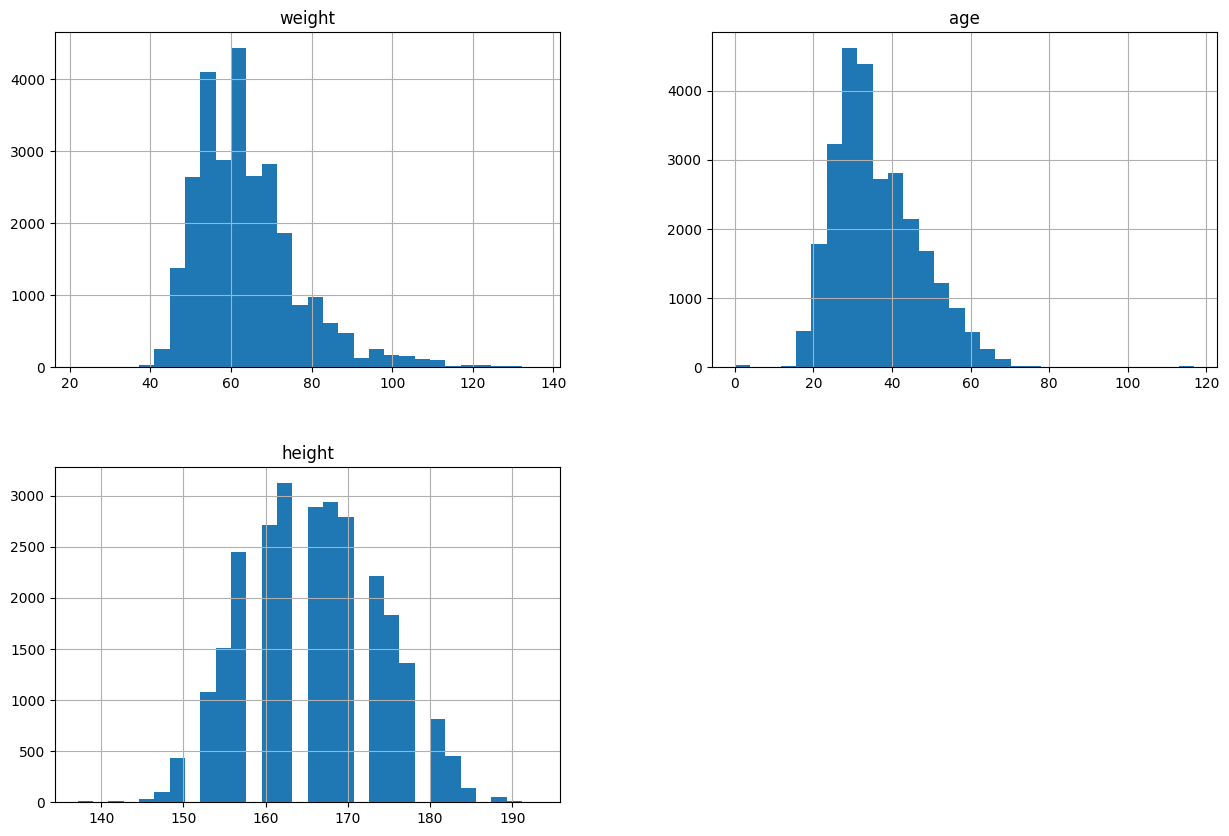

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des variables numériques
data.hist(bins=30, figsize=(15, 10))
plt.show()

**Objectif de la prédiction : **
prédire la taille d'un vêtement en fonction de ses autres propriétés afin de recommander des tailles appropriées aux clients en ligne, améliorant ainsi leur expérience d'achat.

In [156]:
from sklearn.preprocessing import LabelEncoder

# Encodage des labels
label_encoder = LabelEncoder()
data['size_encoded'] = label_encoder.fit_transform(data['size'])

In [157]:
# Sélection des caractéristiques (features) et de la cible (target)
features = data[['weight', 'age', 'height']]
target = data['size_encoded']

In [158]:
from sklearn.model_selection import train_test_split

# Division du jeu de données
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [159]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Entraîner un modèle de régression linéaire :

In [160]:
import tensorflow as tf

# Création du modèle TensorFlow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse')

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Sauvegarder le modèle
model.save('model/clothing_size_model.h5')

Epoch 1/50
675/675 [==============================] - 4s 4ms/step - loss: 3.8561 - val_loss: 3.3736
Epoch 2/50
675/675 [==============================] - 2s 2ms/step - loss: 3.2344 - val_loss: 3.2876
Epoch 3/50
675/675 [==============================] - 2s 3ms/step - loss: 3.1833 - val_loss: 3.2560
Epoch 4/50
675/675 [==============================] - 2s 3ms/step - loss: 3.1630 - val_loss: 3.2957
Epoch 5/50
675/675 [==============================] - 2s 3ms/step - loss: 3.1568 - val_loss: 3.2586
Epoch 6/50
675/675 [==============================] - 2s 3ms/step - loss: 3.1583 - val_loss: 3.3386
Epoch 7/50
675/675 [==============================] - 3s 4ms/step - loss: 3.1484 - val_loss: 3.3227
Epoch 8/50
675/675 [==============================] - 2s 4ms/step - loss: 3.1448 - val_loss: 3.2927
Epoch 9/50
675/675 [==============================] - 2s 3ms/step - loss: 3.1445 - val_loss: 3.2525
Epoch 10/50
675/675 [==============================] - 2s 3ms/step - loss: 3.1421 - val_loss: 3.2681

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [161]:
# Faire des prédictions
y_pred = model.predict(X_test)

169/169 [==============================] - 0s 2ms/step


In [162]:
import subprocess

# Exécuter le serveur FastAPI en arrière-plan
process = subprocess.Popen(["uvicorn", "api:app", "--host", "0.0.0.0", "--port", "8000", "--reload"])
print(f"FastAPI server started with PID: {process.pid}")

FastAPI server started with PID: 43971


In [164]:
import requests
api_url = "http://localhost:8000"

response = requests.get(f"{api_url}/model")
print("Model response:", response.json())

Model response: {'id': 'distilbert/distilbert-base-uncased', 'sha': '12040accade4e8a0f71eabdb258fecc2e7e948be', 'pipeline_tag': 'fill-mask', 'library_name': 'transformers', 'private': False, 'gated': False, 'siblings': [{'rfilename': '.gitattributes', 'size': 445}, {'rfilename': 'LICENSE', 'size': 11356}, {'rfilename': 'README.md', 'size': 8577}, {'rfilename': 'config.json', 'size': 483}, {'rfilename': 'flax_model.msgpack', 'size': 267945836}, {'rfilename': 'model.safetensors', 'size': 267954768}, {'rfilename': 'pytorch_model.bin', 'size': 267967963}, {'rfilename': 'rust_model.ot', 'size': 361732396}, {'rfilename': 'tf_model.h5', 'size': 363423424}, {'rfilename': 'tokenizer.json', 'size': 466062}, {'rfilename': 'tokenizer_config.json', 'size': 48}, {'rfilename': 'vocab.txt', 'size': 231508}], 'safetensors': {'parameters': {'F32': 66985530}}, 'cardData': {'tags': ['exbert'], 'base_model': None}}


In [166]:
# Installation de Ngrok

!pip install pyngrok

In [167]:
import threading
from pyngrok import ngrok
import subprocess

# Fermer tous les tunnels
ngrok.kill()

ngrok.set_auth_token('2ikYRkEJ55v1B04IIr6JqwBfO1n_H5MwX48yb7cDoUe3oP8J')

def run_streamlit():
    subprocess.run(['streamlit', 'run', 'app.py'])

# Lancement de Streamlit dans un thread
thread = threading.Thread(target=run_streamlit)
thread.start()
# Création d'un tunnel ngrok vers l'application Streamlit
public_url = ngrok.connect(8501, "http")
print(f'Application Streamlit accessible à l\'adresse : {public_url}')


Application Streamlit accessible à l'adresse : NgrokTunnel: "https://6b7f-34-31-173-175.ngrok-free.app" -> "http://localhost:8501"
